<a href="https://colab.research.google.com/github/KTeswar15/Programming-for-DS/blob/main/Copy_of_KeerthanaEswarLab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/ftx-2021-01-01--2023-12-31 (3).csv')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [ ]:
#print(data.shape)
print('number of rows:', data.shape[0])
print('numnber of columns:', data.shape[1])

number of rows: 741
numnber of columns: 11


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [ ]:
#drop empty rows
data = data.dropna()
#nothing changes in shape, so no empty rows

#find and deletes duplicates
print(data.duplicated())
print(data.duplicated().sum())
data = data.drop_duplicates()
print(data.shape)
#shape changes because duplicated data is deleted


#dropping the four columns
delete_columns = ['timeOpen','timeClose','timeHigh','timeLow','marketCap']
data = data.drop(columns = delete_columns)
print(data.shape)
#colunmns were dropped and shape was changed, those columns will no longer be found in data

0      False
1      False
2      False
3      False
4      False
       ...  
736    False
737    False
738    False
739    False
740     True
Length: 741, dtype: bool
14
(727, 11)
(727, 6)


Now display the first 10 rows of the cleaned dataset.

In [ ]:
print(data.head(10))

       open      high       low     close       volume  \
0  0.838968  0.853502  0.835226  0.842688   3001502.06   
1  0.860193  0.864752  0.826643  0.839048   3608615.07   
2  0.885723  0.887118  0.843029  0.860231   3766979.57   
3  0.921162  0.925702  0.869842  0.886091   4192949.85   
4  0.931138  0.955402  0.916414  0.923668   4574953.05   
5  0.894567  1.011183  0.893652  0.930696   7065306.21   
6  0.924432  0.935517  0.894370  0.894657   2577834.83   
7  0.957505  0.975671  0.921085  0.924433   5055004.16   
8  1.027133  1.038282  0.948058  0.957006  17088962.94   
9  0.873973  1.127198  0.835625  1.027162  22418556.51   

                  timestamp  
0  2022-12-31T23:59:59.999Z  
1  2022-12-30T23:59:59.999Z  
2  2022-12-29T23:59:59.999Z  
3  2022-12-28T23:59:59.999Z  
4  2022-12-27T23:59:59.999Z  
5  2022-12-26T23:59:59.999Z  
6  2022-12-25T23:59:59.999Z  
7  2022-12-24T23:59:59.999Z  
8  2022-12-23T23:59:59.999Z  
9  2022-12-22T23:59:59.999Z  


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [ ]:
data['close_change'] = data['close'].diff()
print(data.close_change[0:10])

0         NaN
1   -0.003640
2    0.021183
3    0.025860
4    0.037577
5    0.007028
6   -0.036039
7    0.029776
8    0.032574
9    0.070155
Name: close_change, dtype: float64


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
#finds largest values in the column
top_10 = data['close_change'].nlargest(10)

#finds dates assocated with those highest values
top_dates = data[data['close_change'].isin(top_10)][['timestamp','close_change']]

print(top_dates)

                    timestamp  close_change
56   2022-11-07T23:59:59.999Z     16.623292
350  2022-01-20T23:59:59.999Z      6.770635
468  2021-09-16T23:59:59.999Z     14.497738
473  2021-09-19T23:59:59.999Z      8.315742
478  2021-09-15T23:59:59.999Z      9.506381
481  2021-09-12T23:59:59.999Z      5.201864
484  2021-09-09T23:59:59.999Z      6.929033
594  2021-05-22T23:59:59.999Z      6.228516
598  2021-05-18T23:59:59.999Z     14.017812
605  2021-05-11T23:59:59.999Z      5.154806


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
# percent change = ((final - initial)/initial)*100
#use percent change pandas command

data['rate_of_change'] = data['close_change'].pct_change()

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
#finds largest values in the column
print('highest ROC')
top_5 = data['rate_of_change'].nlargest(5)

#finds dates assocated with those highest values
top_dates = data[data['rate_of_change'].isin(top_5)][['timestamp','rate_of_change']]

print(top_dates)

#finds lowst values in the column
print('lowest ROC')
low_5 = data['rate_of_change'].nsmallest(5)

#finds dates assocated with those lowst values
low_dates = data[data['rate_of_change'].isin(low_5)][['timestamp','rate_of_change']]

print(low_dates)

highest ROC
                    timestamp  rate_of_change
110  2022-09-14T23:59:59.999Z      273.028055
182  2022-07-06T23:59:59.999Z      178.229288
216  2022-06-02T23:59:59.999Z       58.778537
369  2021-12-31T23:59:59.999Z       97.180942
516  2021-08-08T23:59:59.999Z      216.674634
lowest ROC
                    timestamp  rate_of_change
135  2022-08-20T23:59:59.999Z    -1146.639156
193  2022-06-25T23:59:59.999Z      -83.605784
240  2022-05-10T23:59:59.999Z     -370.049150
306  2022-03-05T23:59:59.999Z      -79.028479
446  2021-10-15T23:59:59.999Z     -166.691787


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

daily closing price graph: 


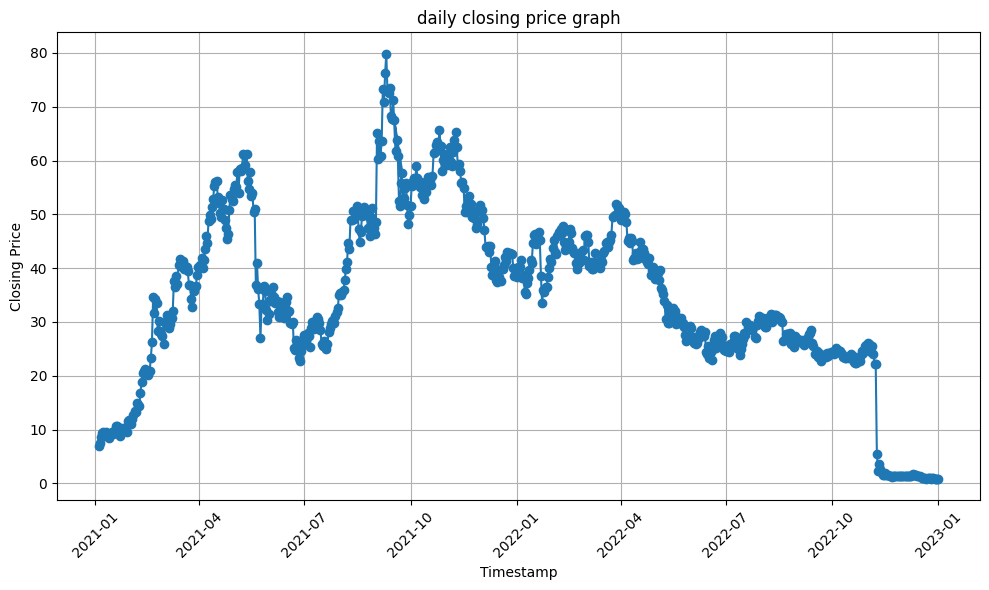

gains and loses (made with close_change): 


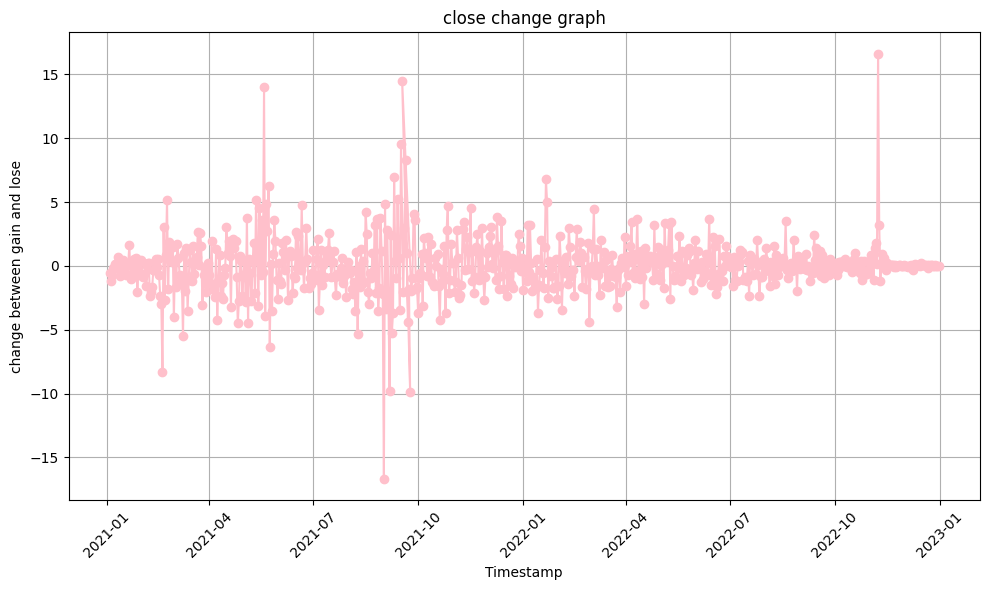

In [ ]:
import matplotlib.pyplot as plt
print('daily closing price graph: ')

data['timestamp'] = pd.to_datetime(data['timestamp'])

plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['close'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('daily closing price graph')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


print('gains and loses (made with close_change): ')

data['timestamp'] = pd.to_datetime(data['timestamp'])

plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['close_change'], marker='o', linestyle='-', color = 'pink')
plt.xlabel('Timestamp')
plt.ylabel('change between gain and lose')
plt.title('close change graph')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

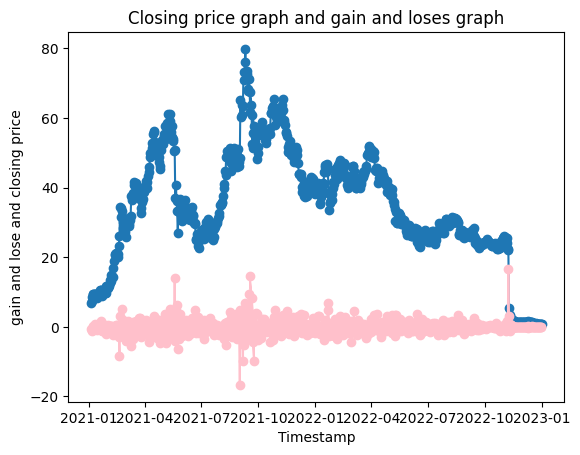

pink color represents the gains and loses
blue color represents close value


In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharey=True)

plt.plot(data['timestamp'], data['close'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Closing price graph and gain and loses graph')


plt.plot(data['timestamp'], data['close_change'], marker='o', linestyle='-', color = 'pink')
plt.xlabel('Timestamp')
plt.ylabel('gain and lose and closing price')
plt.title('Closing price graph and gain and loses graph')

# plt.tight_layout()

plt.show()
print('pink color represents the gains and loses')
print('blue color represents close value')

